In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz

# referenece sample

In [2]:
ref00= pd.read_csv('ref00uW 2024 April 25 16_31_57 34.csv')
#print(data_background)
#plt.plot(data_background.iloc[:,2], data_background.iloc[:,5])

21302.972143137813
76010.46747695867
172890.25179568585
374746.0909310801
720337.924281111


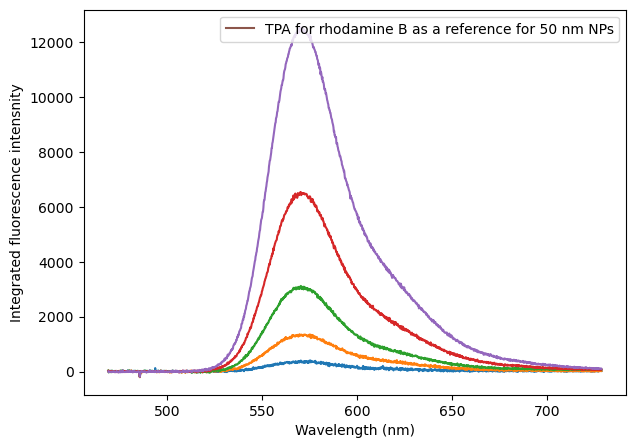

In [3]:
data_30= pd.read_csv('ref30uW 2024 April 25 16_29_30 33.csv')
data_60= pd.read_csv('ref60uW 2024 April 25 16_26_48 32.csv')
data_95= pd.read_csv('ref95uW 2024 April 25 16_23_55 31.csv')
data_130= pd.read_csv('ref130uW 2024 April 25 16_21_07 30.csv')
data_179= pd.read_csv('ref179uW 2024 April 25 16_17_55 29.csv')

plt.figure(figsize=(7,5))
ref_list= [data_30, data_60, data_95, data_130, data_179]

for ref in ref_list:
    ref_subtracted= ref.iloc[:,5] - ref00.iloc[:,5]
    
    baseline_range_reference= (ref.iloc[:,2]>= 500) & (ref.iloc[:,2] <= 510)
    baseline_ref= np.mean(ref_subtracted[baseline_range_reference])
    
    ref_subtracted -=baseline_ref
    
    areas= np.trapz(ref_subtracted, x= ref.iloc[:,2])
    print(areas)
    
    plt.plot(ref.iloc[:,2], ref_subtracted)

plt.plot([], [], label='TPA for rhodamine B as a reference for 50 nm NPs')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensnity')
plt.legend()
plt.show()

A when I_exc = 1: 22215042.21078238


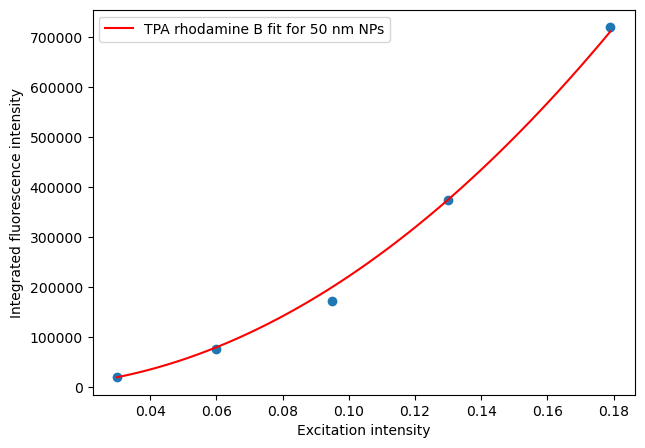

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
def fitting_func_ref(I_exc, A):
    return A * I_exc**2

I_exc_values = np.array([0.030, 0.060, 0.095, 0.130, 0.179])
Integrated_fluorescence_intensity_values_for_reference = np.array([21302.972143137813, 76010.46747695867, 172890.25179568585, 374746.0909310801, 720337.924281111])

I_exc_values_squared = I_exc_values

popt, pcov = curve_fit(fitting_func_ref, I_exc_values_squared, Integrated_fluorescence_intensity_values_for_reference)
A_opt = popt[0]

plt.scatter(I_exc_values_squared, Integrated_fluorescence_intensity_values_for_reference)

I_exc_fit_ref = np.linspace(min(I_exc_values_squared), max(I_exc_values_squared))
Integrated_fluorescence_intensity_fit_ref = fitting_func_ref(I_exc_fit_ref, A_opt)

plt.plot(I_exc_fit_ref, Integrated_fluorescence_intensity_fit_ref, 'r-', label='TPA rhodamine B fit for 50 nm NPs')

# Find A when I_exc = 1
A_when_I_exc_1 = fitting_func_ref(1, A_opt)
print("A when I_exc = 1:", A_when_I_exc_1)

plt.xlabel('Excitation intensity')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()
plt.show()


# sample

In [5]:
sample00= pd.read_csv('sample00uW 2024 April 25 16_57_10 43.csv')
#print(data_background_sample)

# plt.plot(data_background_sample.iloc[:,2], data_background_sample.iloc[:,5])

5717.985586820333
23680.518756270918
43683.23766345468
78403.87276849899
140851.18333484055


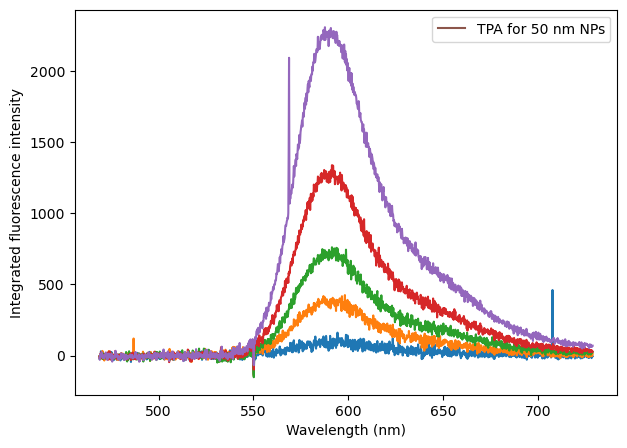

In [6]:
data_30sample= pd.read_csv('sample30uW 2024 April 25 16_54_43 42.csv')
data_70sample= pd.read_csv('sample70uW 2024 April 25 16_49_56 40.csv')
data_100sample= pd.read_csv('sample100uW 2024 April 25 16_42_43 37.csv')
data_130sample= pd.read_csv('sample130uW 2024 April 25 16_40_06 36.csv')
data_173sample= pd.read_csv('sample173uW 2024 April 25 16_37_11 35.csv')

sample_list= [data_30sample, data_70sample, data_100sample, data_130sample, data_173sample]

plt.figure(figsize=(7,5))
for sample in sample_list:
    sample_subtracted= sample.iloc[:,5] - sample00.iloc[:,5]
    
    baseline_range_sample= (sample.iloc[:,2]>= 500) & (sample.iloc[:,2] <= 510)
    baseline_sample= np.mean(sample_subtracted[baseline_range_sample])
    
    sample_subtracted -=baseline_sample
    
    areas= np.trapz(sample_subtracted, x= sample.iloc[:,2])
    print(areas)
    
    plt.plot(sample.iloc[:,2], sample_subtracted)

plt.plot([], [], label='TPA for 50 nm NPs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()
plt.show()

4669032.426641609


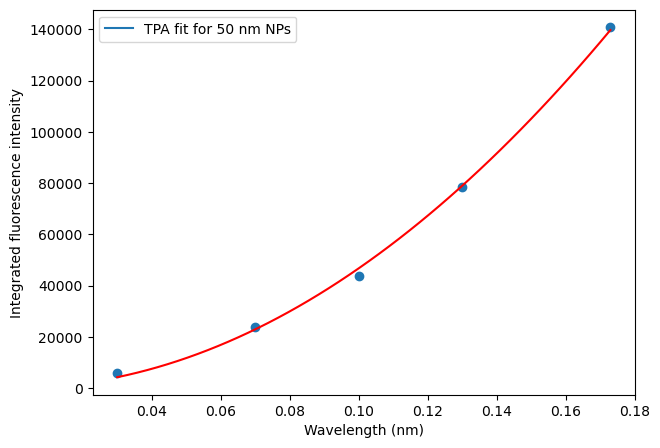

In [7]:
plt.figure(figsize=(7,5))

def fitting_func_sample(I_exc, a):
    return a * I_exc**2

I_exc_values_sample= np.array([0.030, 0.07, 0.1, 0.130, 0.173])
Integrated_fluorescence_intensity_values_for_sample= np.array([5717.985586820333, 23680.518756270918, 43683.23766345468,78403.87276849899,140851.18333484055])  
    
I_exc_values_sample_squared= I_exc_values_sample

popt, pcov= curve_fit(fitting_func_sample, I_exc_values_sample_squared,Integrated_fluorescence_intensity_values_for_sample)

a_opt= popt[0]

plt.scatter(I_exc_values_sample_squared, Integrated_fluorescence_intensity_values_for_sample)


I_exc_fit_sample = np.linspace(min(I_exc_values_sample_squared), max(I_exc_values_sample_squared))

Integrated_fluorescence_intensity_fit_sample = fitting_func_sample(I_exc_fit_sample, a_opt)

plt.plot(I_exc_fit_sample, Integrated_fluorescence_intensity_fit_sample, 'r-',)

print(a_opt)

plt.plot([], [], label='TPA fit for 50 nm NPs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()
plt.show()

In [8]:
abs_data= pd.read_csv('ABS results for TPA measurments both ref and sample .csv')

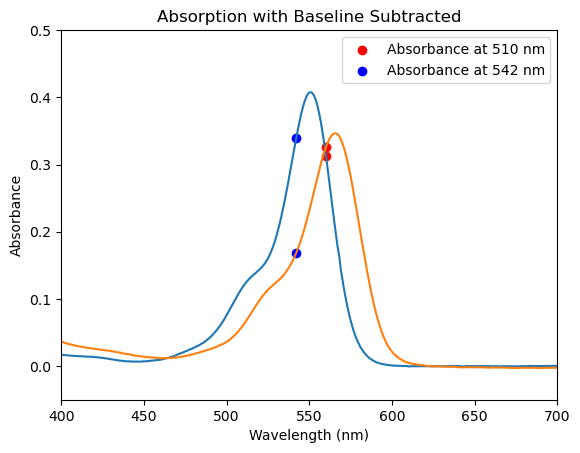

Absorbance at 560 nm for samples: [0.31330299382148513, 0.3258802287462376]
Absorbance at 542 nm for reference samples: [0.33895897862148516, 0.1683486543462376]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

wavelength_R = np.array([abs_data.iloc[:, 6], abs_data.iloc[:, 8]])
absorbance_R = np.array([abs_data.iloc[:, 7], abs_data.iloc[:, 9]])

absorbance_at_560 = []
absorbance_at_542 = []
baseline_values = []


baseline_start = 600
baseline_end = 700


for i in range(len(wavelength_R)):
    baseline_range = (wavelength_R[i] >= baseline_start) & (wavelength_R[i] <= baseline_end)
    if np.any(baseline_range):
        baseline = np.mean(absorbance_R[i][baseline_range])
        absorbance_R[i] -= baseline
        baseline_values.append(baseline)
        plt.plot(wavelength_R[i], absorbance_R[i])
    else:
        baseline_values.append(np.nan) 
        print("No data points in the range [600, 700] for dataset", i)

for i in range(len(wavelength_R)):
    for j in range(len(wavelength_R[i])):
        if wavelength_R[i][j] == 560:
            absorbance_at_560.append(absorbance_R[i][j])
        elif wavelength_R[i][j] == 542:
            absorbance_at_542.append(absorbance_R[i][j])

plt.ylim(-0.05, 0.5)
plt.xlim(400, 700)   
plt.scatter([560] * len(absorbance_at_560), absorbance_at_560, color='red', label='Absorbance at 510 nm')
plt.scatter([542] * len(absorbance_at_542), absorbance_at_542, color='blue', label='Absorbance at 542 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorption with Baseline Subtracted')
plt.legend()
plt.show()

# Print absorbance values
print("Absorbance at 560 nm for samples:", absorbance_at_560)
print("Absorbance at 542 nm for reference samples:", absorbance_at_542)


Text(0, 0.5, 'Counts')

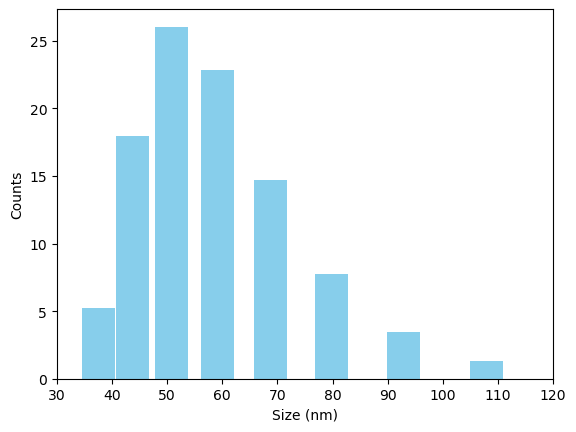

In [10]:
size_data= np.loadtxt('New nps with new conc.txt')
#print(size_data)
plt.bar(size_data[:,0], size_data[:,1], width= 6, color= 'skyblue')
plt.xlim(30,120)
#print(max(size_data[:,0]))

plt.xlabel('Size (nm)')
plt.ylabel('Counts')
